In [1]:
import numpy as np 
from keras import layers 
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D 
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D 
from keras.models import Model 
from keras.preprocessing import image 
from keras.utils import layer_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
import pydot 
from IPython.display import SVG 
from keras.utils.vis_utils import model_to_dot 
from keras.utils import plot_model 
import kt_utils 
import keras.backend as K 
K.set_image_data_format('channels_last') 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow 

%matplotlib inline


Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = kt_utils.load_dataset()

# Normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0])) 
print ("number of test examples = " + str(X_test.shape[0])) 
print ("X_train shape: " + str(X_train.shape)) 
print ("Y_train shape: " + str(Y_train.shape)) 
print ("X_test shape: " + str(X_test.shape)) 
print ("Y_test shape: " + str(Y_test.shape))



number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [3]:
def HappyModel(input_shape):
    """
    实现一个检测笑容的模型

    参数：
        input_shape - 输入的数据的维度
    返回：
        model - 创建的Keras的模型

    """
    # 定义一个tensor的placeholder 维度为input_shape
    X_input = Input(input_shape)
    
    # 使用0填充，X_input周围填充0
    X = ZeroPadding2D((3,3))(X_input)
    
    # 对X使用conv -> bn -> relu块
    X = Conv2D(32,(7,7),strides=(1,1),name= 'conv0')(X)
    X = BatchNormalization(axis=3,name='bn0')(X)
    X = Activation('relu')(X)
    
    # 最大值池化层
    X= MaxPooling2D((2,2),name='max_pool')(X)
    
    # 降维 矩阵转换成向量 + 全连接层
    X = Flatten()(X)
    X = Dense(1,activation='sigmoid',name='fc')(X)
    
    # 创建一个模型
    model = Model(inputs = X_input,outputs=X,name='HappyModel')
    
    return model
    

In [4]:
# 创建模型实体
happy_model = HappyModel(X_train.shape[1:])
# 编译模型
happy_model.compile("adam","binary_crossentropy",metrics=['accuracy'])
# 训练模型  6-10mins
happy_model.fit(X_train, Y_train, epochs=40, batch_size=50)
# 评估模型
preds = happy_model.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None) 
print ("误差值 = " + str(preds[0])) 
print ("准确度 = " + str(preds[1]))


Epoch 1/40
600/600 [==============================] - 16s 27ms/step - loss: 2.9773 - acc: 0.5183
Epoch 2/40
600/600 [==============================] - 16s 27ms/step - loss: 0.5289 - acc: 0.7333
Epoch 3/40
600/600 [==============================] - 16s 26ms/step - loss: 0.2844 - acc: 0.8817
Epoch 4/40
600/600 [==============================] - 13s 21ms/step - loss: 0.2244 - acc: 0.9067
Epoch 5/40
600/600 [==============================] - 12s 20ms/step - loss: 0.1578 - acc: 0.9383
Epoch 6/40
600/600 [==============================] - 11s 18ms/step - loss: 0.1126 - acc: 0.9683
Epoch 7/40
600/600 [==============================] - 12s 21ms/step - loss: 0.1000 - acc: 0.9733
Epoch 8/40
600/600 [==============================] - 13s 21ms/step - loss: 0.1190 - acc: 0.9567
Epoch 9/40
600/600 [==============================] - 11s 19ms/step - loss: 0.0952 - acc: 0.9717
Epoch 10/40
600/600 [==============================] - 11s 19ms/step - loss: 0.0830 - acc: 0.9717
Epoch 11/40
600/600 [========

[[1.]]


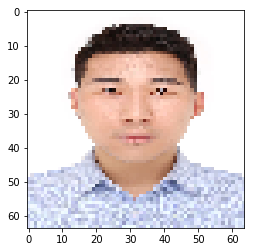

In [5]:
img_path = 'images/smile.jpg'
img = image.load_img(img_path, target_size=(64, 64)) 
imshow(img) 
x = image.img_to_array(img) 
x = np.expand_dims(x, axis=0) 
x = preprocess_input(x) 
print(happy_model.predict(x))
